In [ ]:
import urllib.request
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/ingus-t/SPAI/master/resources/Data_Entry_2017.csv")

def download_all_images():
  # URLs for the zip files
  links = [
      'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
      'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
      'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
      'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
      'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
      'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
      'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
      'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
      'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
      'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
      'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
      'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
  ]

  for idx, link in enumerate(links):
      fn = 'images_%02d.tar.gz' % (idx+1)
      print ('downloading', fn, '...')
      urllib.request.urlretrieve(link, fn)  # download the zip file
  print ("Download complete. Please check the checksums")

# Data cleaning

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ingus-t/SPAI/master/resources/Data_Entry_2017.csv")
df.head(5)

In [ ]:
# create columns with disease name and set 1s and 0s according to finding labesl
diseases = ["No Finding",
            "Infiltration",
            "Atelectasis",
            "Effusion",
            "Nodule",
            "Pneumothorax",
            "Mass",
            "Consolidation",
            "Pleural_Thickening",
            "Cardiomegaly",
            "Emphysema",
            "Fibrosis",
            "Edema",
            "Pneumonia",
            "Hernia"]

#loop on each
for disease in diseases:
  df[disease] = df['Finding Labels'].map(lambda x: 1 if disease in x else 0)
df2 = df.copy()


In [ ]:
df2.drop(df2.columns[[2,3,4,5,6,7,8,9,10,11,12]], axis=1, inplace=True) #3mlt run kaza mara 3lashan ashel ely malosh lazma
df2.head(10)

In [ ]:
df2['vector'] = df2.apply(lambda row: [row[col] for col in diseases], axis=1)
df2.head()

# Image Resizing

In [ ]:
import cv2
import os
import numpy as np

new_dim = (256,256)
images_path = "D:/GAM3A/5-Senior02/GP/1-ChatBot/GP-Chatbot/Dataset/images"
X = []
Y = []
for i, row in df2.iterrows():
  # if i < 60652:
  #   continue
  if(i%10000 == 0):
    print(i,'/',df2.shape[0])
  img = cv2.imread(os.path.join(images_path, df2['Image Index'][i]))
  img = cv2.resize(img,(256,256))
  X.append(img)
  Y.append(df2['vector'][i])


In [ ]:
#save the data X and Y
# import pickle

# with open('X_rest.pickle', 'wb') as f:
#     pickle.dump(X, f)
# with open('Y_rest.pickle', 'wb') as f:
#     pickle.dump(Y, f)

# **Start HERE**

In [1]:
# type: ignore
import pickle
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
#loading
X_1 = pickle.load(open('X_60652.pickle', 'rb'))
Y_1 = pickle.load(open('Y_60652.pickle', 'rb'))
X_2 = pickle.load(open('X_rest.pickle', 'rb'))
Y_2 = pickle.load(open('Y_rest.pickle', 'rb'))

In [3]:
X = X_1 + X_2
Y = Y_1 + Y_2
del X_1
del Y_1
del X_2
del Y_2

In [4]:
print(len(X))
print(len(Y))

112120
112120


In [46]:
print(len(y_train[2000:26000]))

24000


[4201 7921 8063 7240 4425 3705 4030 3264 2364 1938 1759 1174 1610  999]


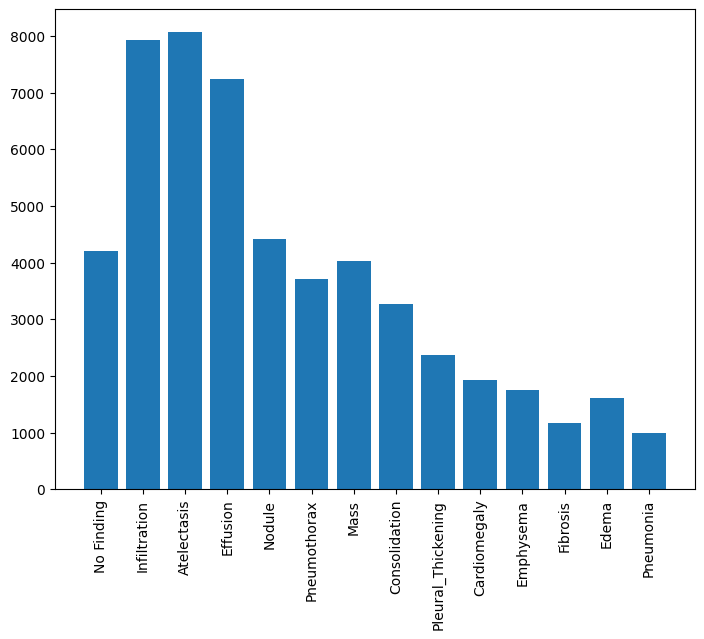

In [60]:
# plt grid of labels distribution
import matplotlib.pyplot as plt
labels = ["No Finding", "Infiltration", "Atelectasis", "Effusion", "Nodule", "Pneumothorax", "Mass", "Consolidation", "Pleural_Thickening", "Cardiomegaly", "Emphysema", "Fibrosis", "Edema", "Pneumonia"]
T_Y = np.array(y_train)
labels_total = np.sum(T_Y, axis=0)
print(labels_total)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, labels_total)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# get average size of each finding
print(labels_total) # this is the total number of each finding
t_size = np.sum(labels_total[1:-1]) # this is the total number of all findings
print(t_size)
avg_size = t_size // 14 # let us say we are going to make the no Findings the same size as the average size of the other findings

#create new temp array to insert the data in it 
X_temp = []
Y_temp = []

counts = {}

for i,row in df2.iterrows():
    if "Hernia" in df2["Finding Labels"][i]:
        continue
    if df2["Finding Labels"][i] == "Infiltration" or df2['Finding Labels'][i] == "Effusion":
        if counts.get(df2["Finding Labels"][i]) == None:
            counts[df2["Finding Labels"][i]] = 0
            
        if counts[df2["Finding Labels"][i]] > 1000:
            continue
        
        counts[df2["Finding Labels"][i]] += 1
    
    if df2["Finding Labels"][i] == "No Finding":
        if counts.get(df2["Finding Labels"][i]) == None:
            counts[df2["Finding Labels"][i]] = 0
            
        if counts[df2["Finding Labels"][i]] > 6000:
            continue
        
        counts[df2["Finding Labels"][i]] += 1
       
    X_temp.append(X[i])
    Y_temp.append(Y[i])
    
print(len(X_temp))
print(len(Y_temp))

In [1]:
import pickle
X  = pickle.load(open('X_temp.pickle', 'rb'))
Y = pickle.load(open('Y_temp.pickle', 'rb'))

In [3]:
#remove the last element in Y make dim = 14
import numpy as np
X= np.array(X)
Y = np.array(Y)
Y = Y[:, :-1]

In [15]:
print(X.shape)
print(Y.shape)

AttributeError: 'list' object has no attribute 'shape'

In [16]:
#data splitting 
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split

x_train, y_train, x_test, y_test = iterative_train_test_split(np.array(X), np.array(Y), test_size=0.2)
x_train, y_train, x_val,  y_val = iterative_train_test_split(x_train, y_train, test_size=0.125)

MemoryError: Unable to allocate 20.5 GiB for an array with shape (112120, 256, 256, 3) and data type uint8

In [6]:
print(type(y_train))

<class 'numpy.ndarray'>


# CNN building

In [9]:
# ype: ignore
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet152
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


# base_model = ResNet152(weights='imagenet', include_top=False)

# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, activation='relu')(x)

# predictions = Dense(14, activation='sigmoid')(x)

# #take train and val data to train the model
# model = Model(inputs=base_model.input, outputs=predictions)

# for layer in base_model.layers: #freeze the layers "to preserve the weights"
#     layer.trainable = False
    
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # model.summary()
#t

In [ ]:
# model.fit(x_train, y_train, epochs = 30, batch_size=32, validation_data=(x_val, y_val))

In [22]:
# #type: ignore
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization,Dropout
    
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', use_bias=False))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(14, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 254, 254, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 125, 125, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 60, 60, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 12, 12, 64)     │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             

 Total params: 613,230 (2.34 MB)

 Trainable params: 612,142 (2.34 MB)

 Non-trainable params: 1,088 (4.25 KB)

## train the model


In [24]:
print(len(x_train))

32445


In [25]:
#start training on validation data
history = model.fit(x_train[0:8000], y_train[0:8000], epochs=10, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1256s 2s/step - accuracy: 0.2202 - loss: 0.6194 - val_accuracy: 0.1413 - val_loss: 0.5613
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1439s 3s/step - accuracy: 0.5110 - loss: 0.2347 - val_accuracy: 0.1512 - val_loss: 0.3921
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1557s 3s/step - accuracy: 0.5049 - loss: 0.2272 - val_accuracy: 0.1582 - val_loss: 0.3870
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1171s 2s/step - accuracy: 0.5243 - loss: 0.2191 - val_accuracy: 0.1367 - val_loss: 0.4609
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 978s 2s/step - accuracy: 0.5163 - loss: 0.2201 - val_accuracy: 0.1380 - val_loss: 0.3998
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1163s 2s/step - accuracy: 0.5205 - loss: 0.2147 - val_accuracy: 0.1323 - val_loss: 0.5954
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1347s 3s/step - accuracy: 0.5275 - loss: 0.2185 - val_accuracy: 0.1545 - val_loss: 0.3859
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1227s 2s/step - accuracy: 0.5281 - loss: 0.2146 - v

In [26]:
#save the model as pickle
import pickle
with open('./models/model_ALL_53PERCENT_balanced_OVERFIT_val_15_.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
#test the model
X_test = np.array(X_test)
y_test = np.array(y_test)
with tf.device('/GPU:1'):
    model.evaluate(X_test, y_test)

In [ ]:
#get the predictions
with tf.device('/GPU:1'):
    y_pred = model.predict(X_test)

In [71]:
import numpy as np

image_test = X[3]
#reshape to (none,256,256,3)
image_test = image_test.reshape(1,256,256,3)

result = model.predict(image_test)
print(result)
print(np.argmax(result))
print(Y[3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
[[0.42057863 0.15782915 0.17557302 0.26176894 0.11632634 0.07564685
  0.09173848 0.04270272 0.09158749 0.07042719 0.05478881 0.07976094
  0.0159533  0.02401553]]
0
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [55]:
# load model
from tensorflow.keras.models import load_model
import pickle

model = pickle.load(open('models\model_ALL_53PERCENT_balanced_OVERFIT_val_15_.pickle', 'rb'))


model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 254, 254, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 125, 125, 64)   │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 60, 60, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 12, 12, 64)     │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             

 Total params: 1,837,516 (7.01 MB)

 Trainable params: 612,142 (2.34 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 1,224,286 (4.67 MB)